* Project Team ID - PTID-CDS-SEP-25-3134
* Project id - PRCP-1009-CellPhonePrice

## Business Case
* Predict mobile phone price range according to it's features
* 0 - low price
* 1 - medium price
* 2 - high price
* 3 - very high price

## DOMAIN ANALYSIS

*	battery_power - Total energy a battery can store in one time measured in mAh
*	blue - Has bluetooth or not
*	clock_speed - speed at which microprocessor executes instructions
*	dual_sim - Has dual sim support or not
*	fc - Front Camera mega pixels
*	four_g - Has 4G or not
*	int_memory - Internal Memory in Gigabytes
*	m_dep - Mobile Depth in cm
*	mobile_wt - Weight of mobile phone
*	n_cores - Number of cores of processor
*	pc - Primary Camera mega pixels
*	px_height - Pixel Resolution Height
*	px_width - Pixel Resolution Width
*	ram - Random Access Memory in Megabytes
*	sc_h - Screen Height of mobile in cm
*	sc_w - Screen Width of mobile in cm
*	talk_time - longest time that a single battery charge will last when you are
*	three_g - Has 3G or not
*	touch_screen - Has touch screen or not
*	wifi - Has wifi or not
*	price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


* battery power,px area, Touch screen, Mobile wieght, ram, dual sim these some columns are importent.

1. categorical(binary) columns name (6)
* blue,
dual_sim,
four_g,
three_g,
touch_screen,
wifi

2. continuous or discrete columns name (14)
* battery_power,
clock_speed,
fc(discrete),
int_memory,
m_dep,
mobile_wt,
n_cores(discrete),
pc(discrete),
px_height,
px_width,
ram,
sc_h,
sc_w,
talk_time

* Some columns needs to transform for balance the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Basic check

In [2]:
df = pd.read_csv("datasets_11167_15520_train.csv")

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


* Null value or missing values are not observed.

### EDA

In [7]:
columns = df.select_dtypes(include=['int64','float64']).columns

#### Univariate analysis

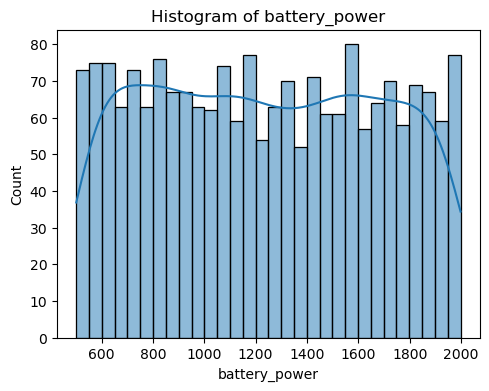

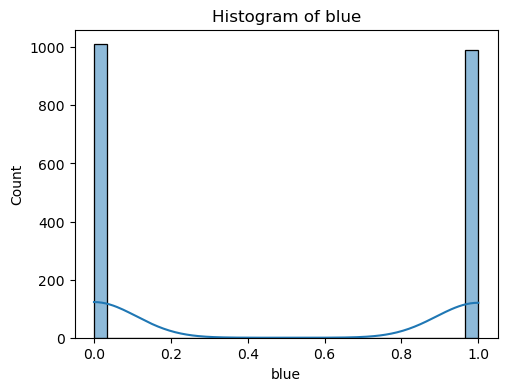

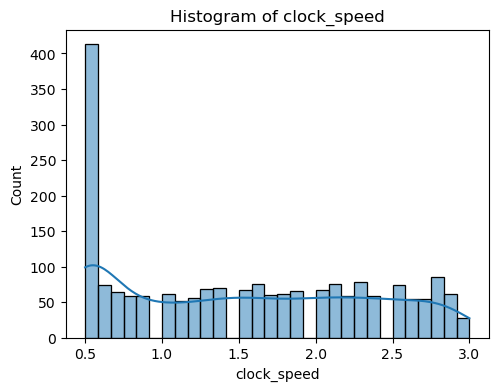

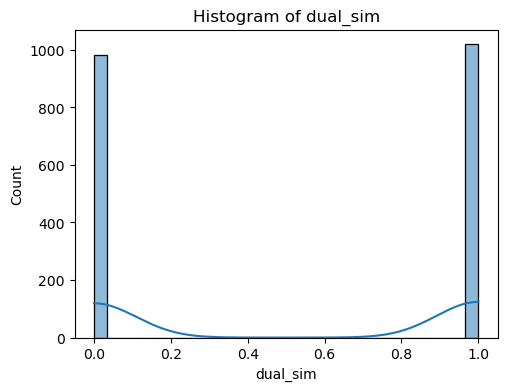

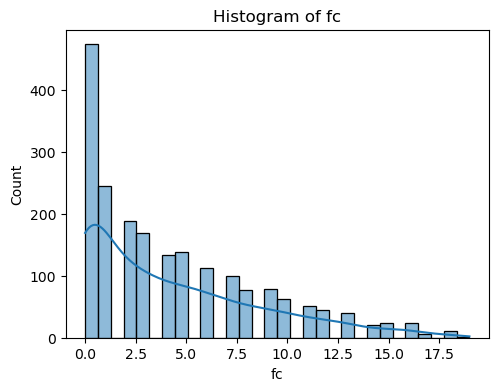

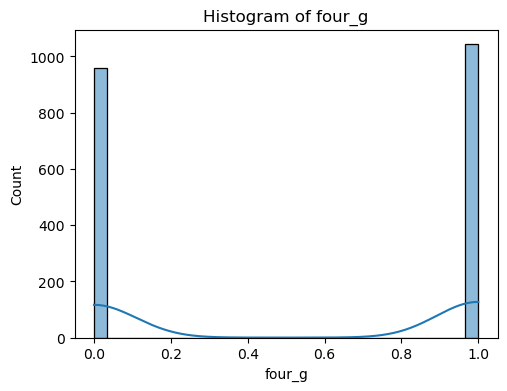

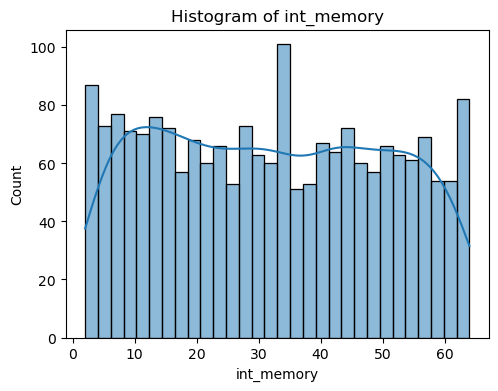

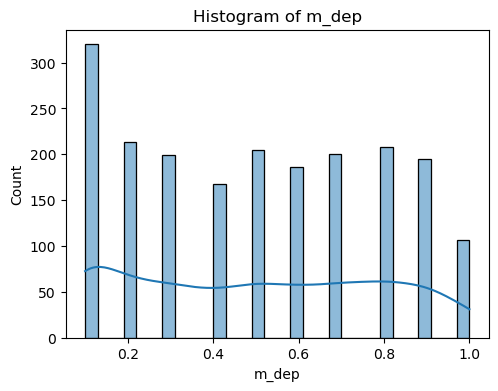

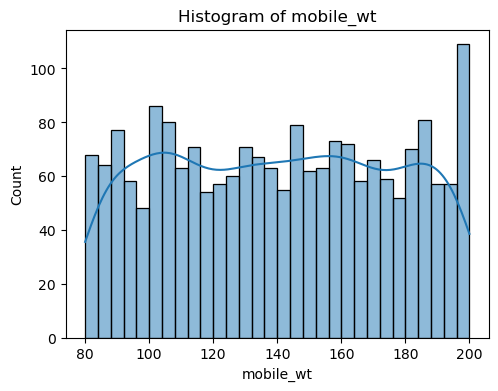

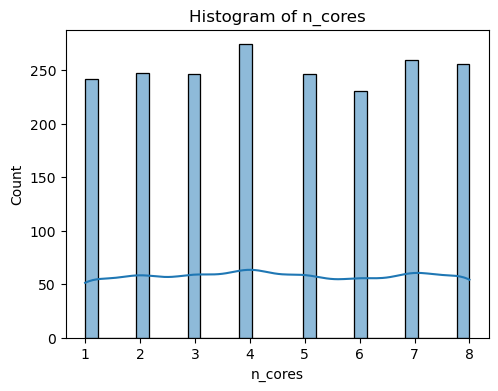

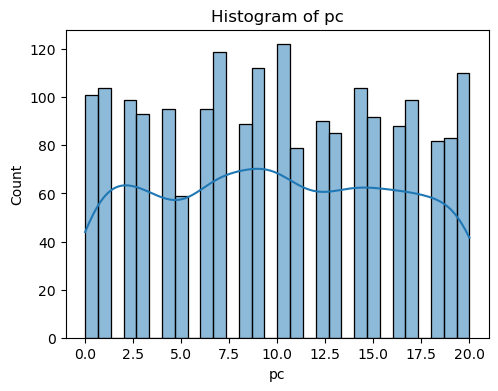

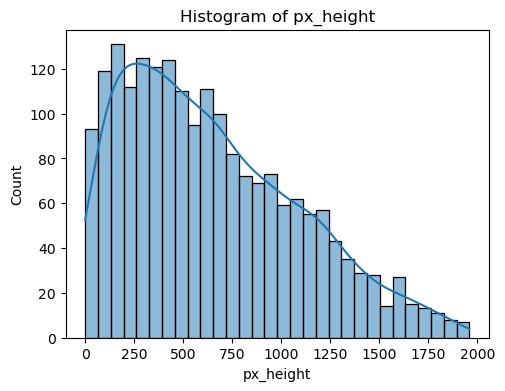

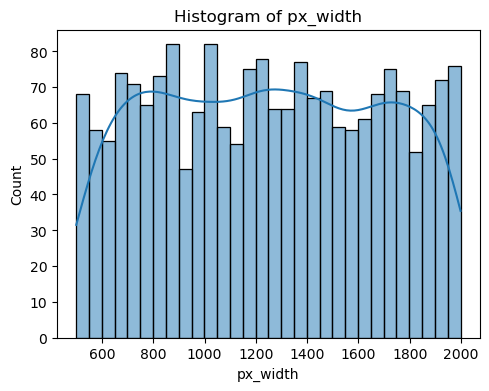

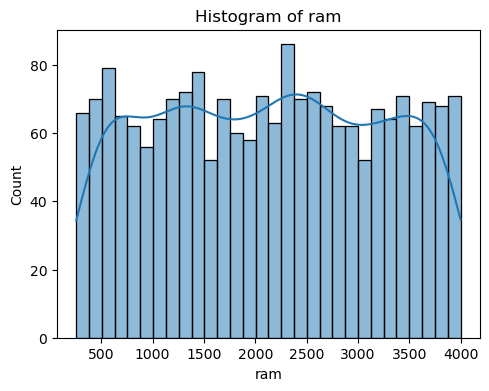

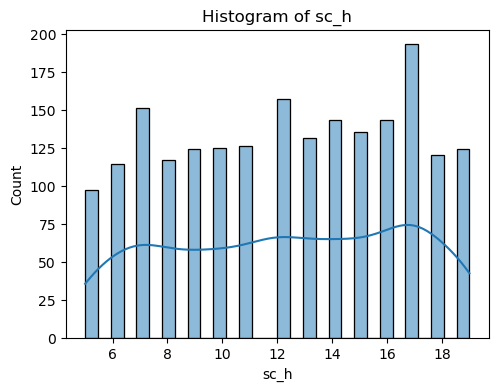

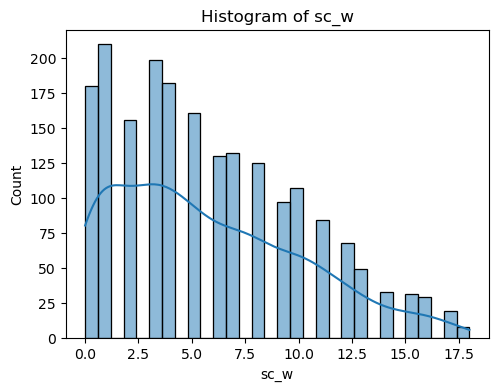

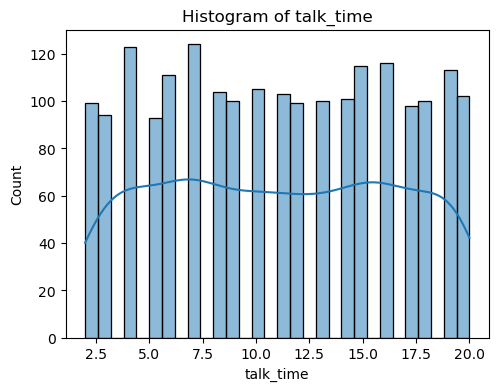

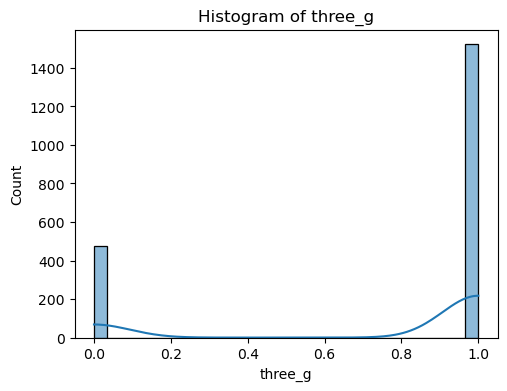

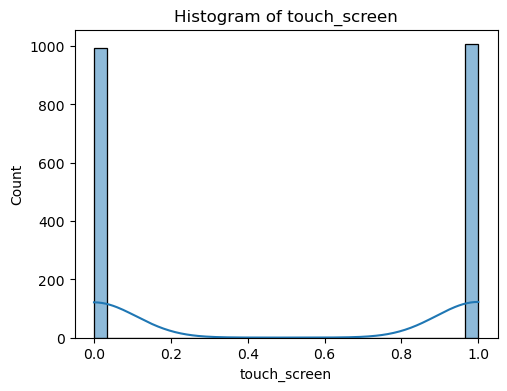

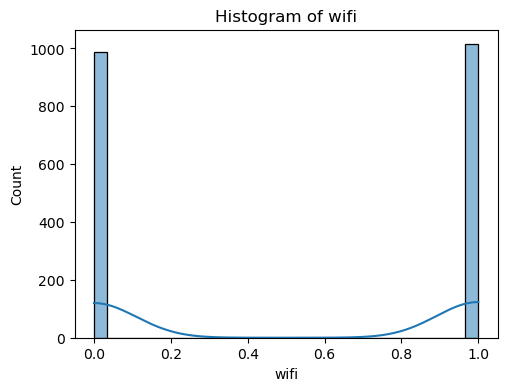

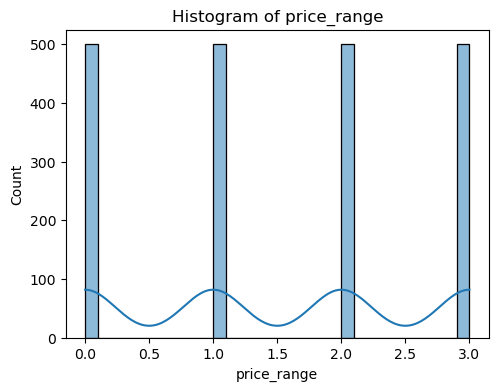

In [8]:
for col in columns:
    plt.figure(figsize=(12,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(f"Histogram of {col}")

#### Bivariate  anlysis
* To see relationship between all columns with target variable

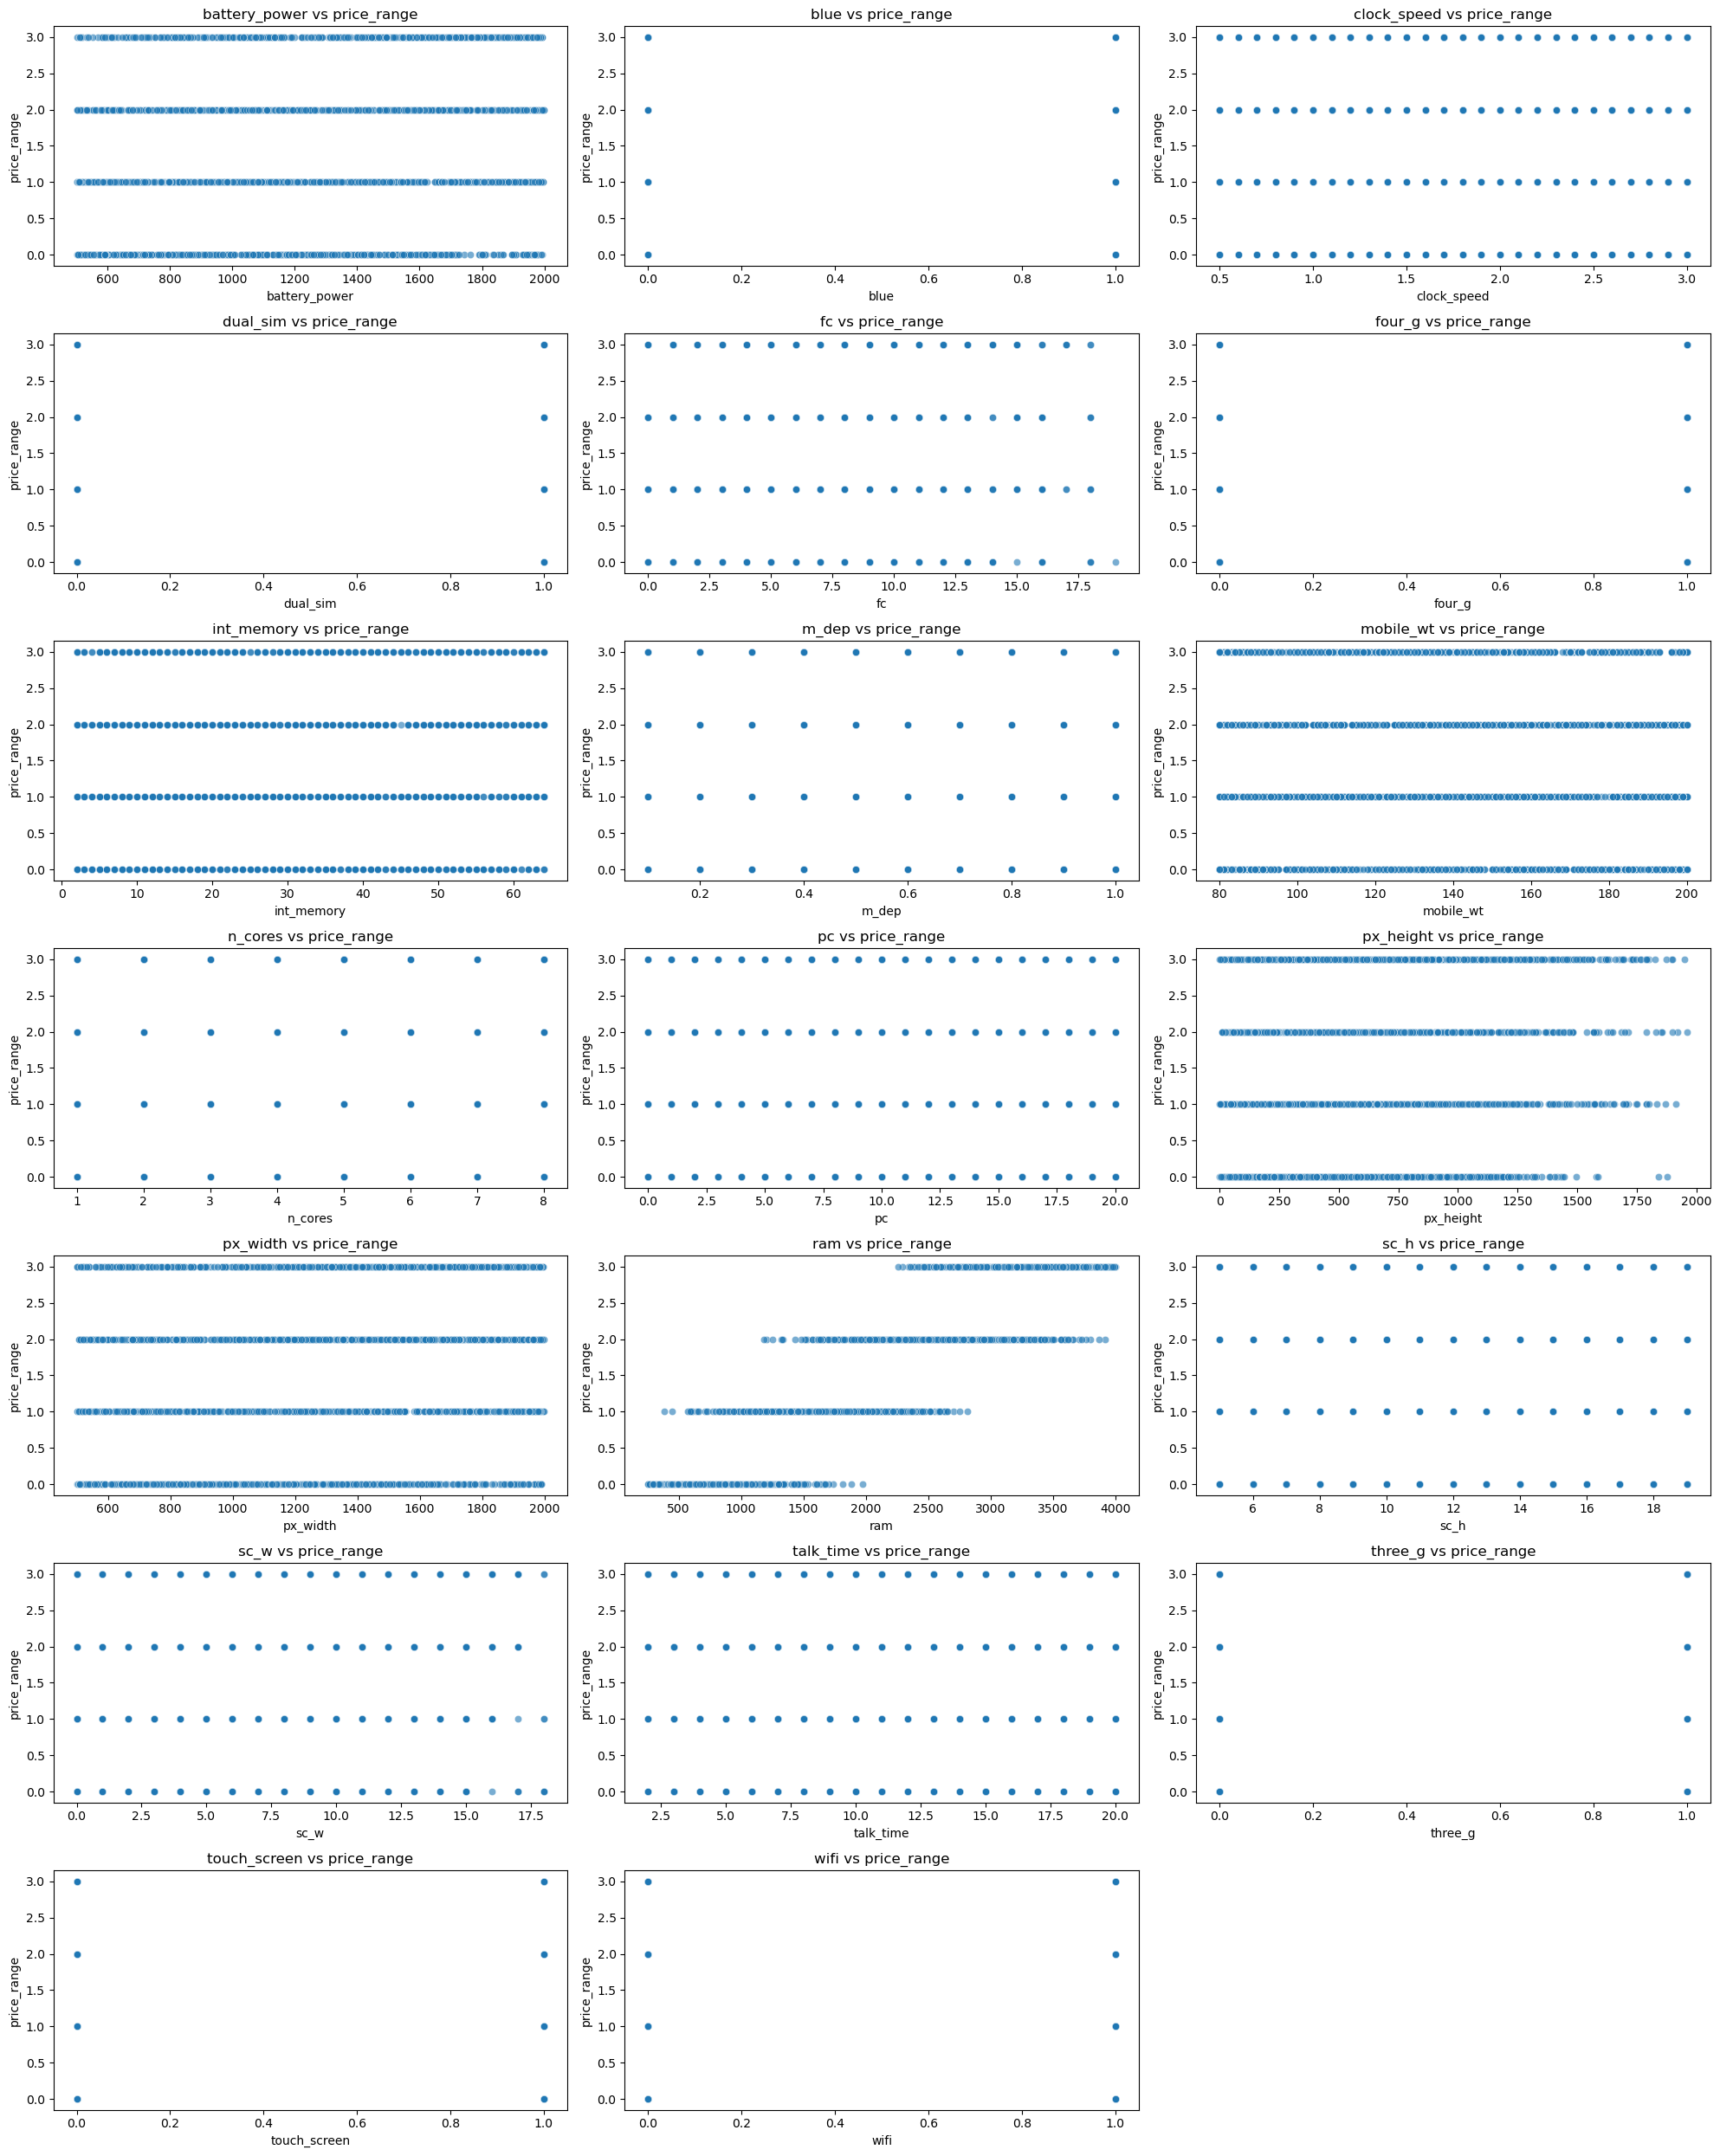

In [9]:
columns = df.drop(columns=['price_range']).columns

plt.figure(figsize=(20, 25))

for i, col in enumerate(columns, 1):
    plt.subplot(7, 3, i) 
    sns.scatterplot(x=df[col], y=df["price_range"], alpha=0.6)
    plt.title(f"{col} vs price_range")

plt.tight_layout()
plt.show()

* we can see that most columns have classification or discrete data

### Feature engineering
* Data Preprocessing

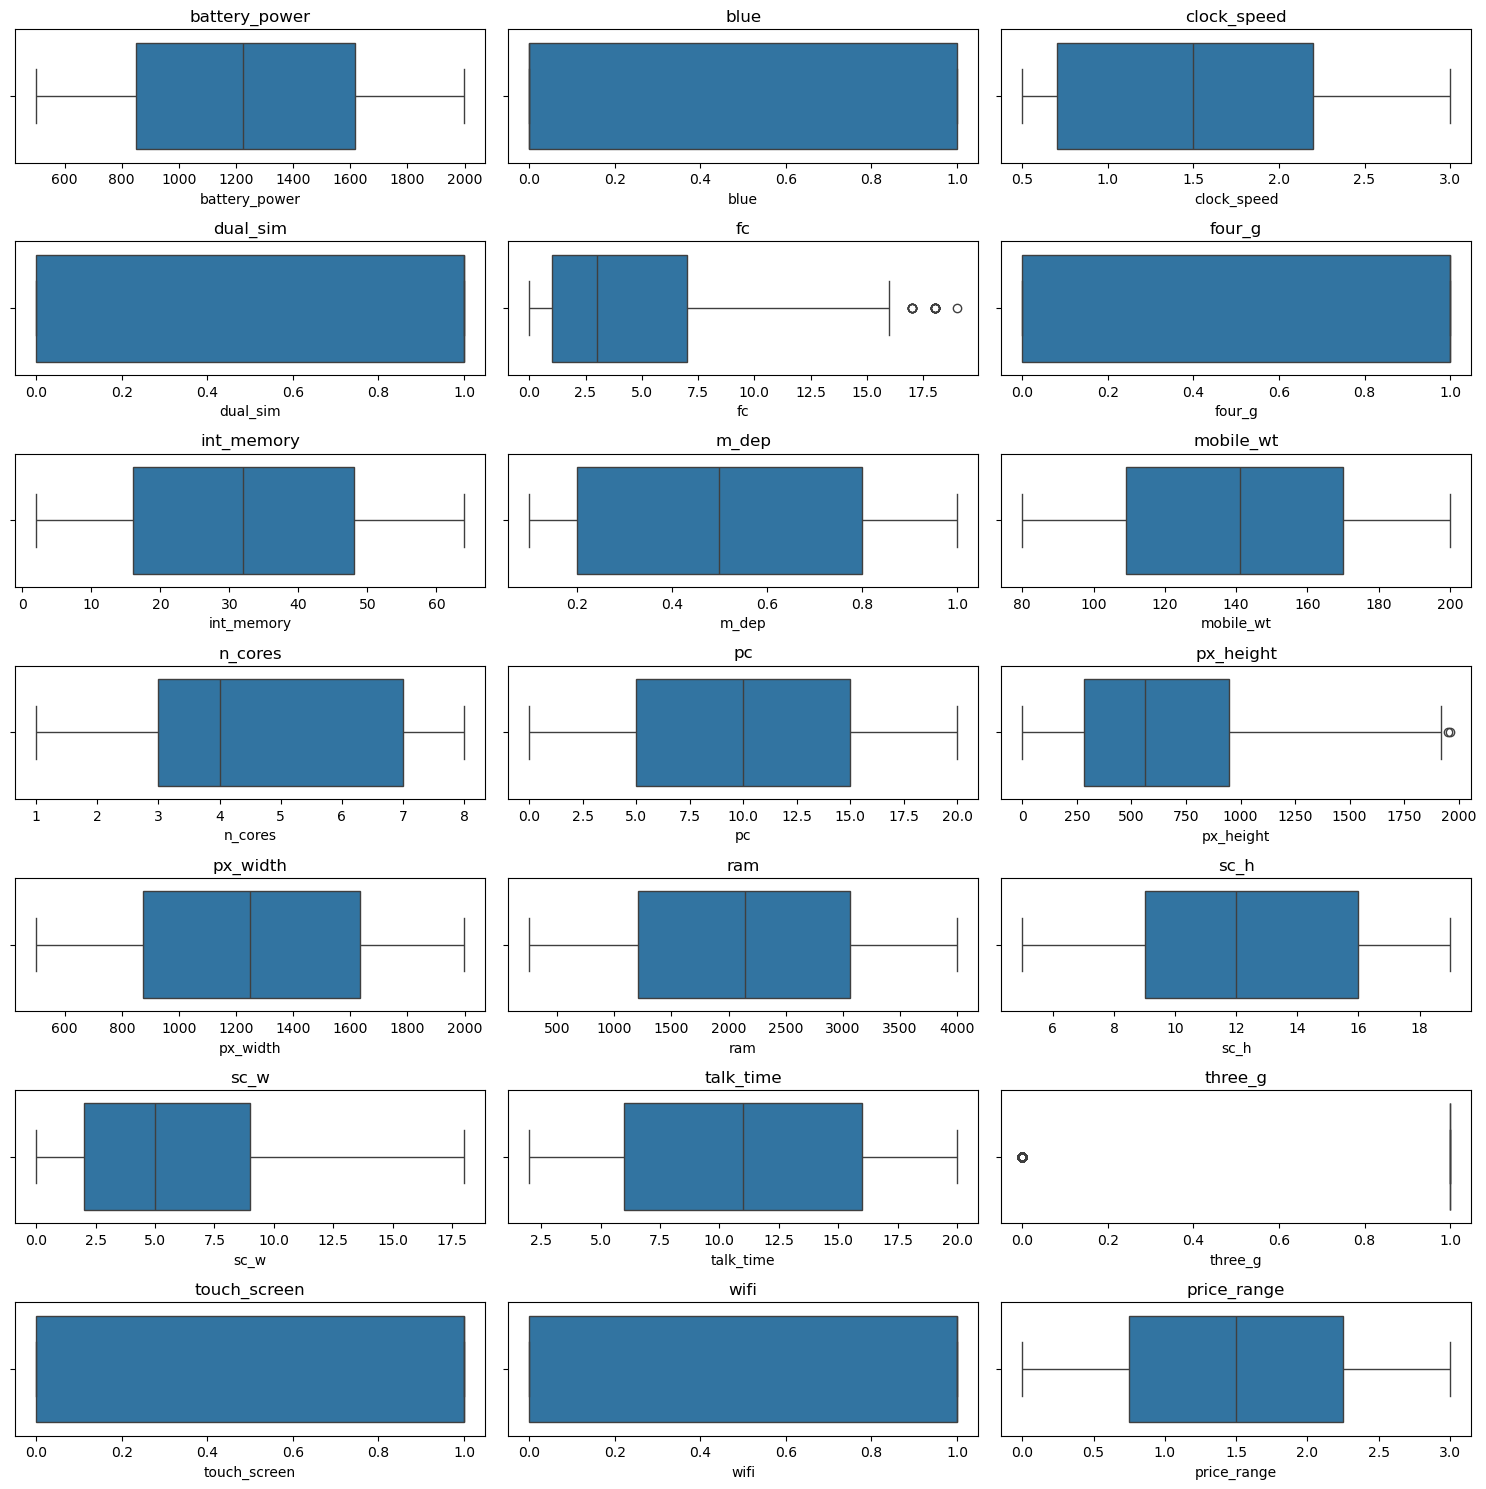

In [10]:
# first find outliers
plot = 1
plt.figure(figsize=(15, 15))

for col in df.columns:  
    if plot <= 21:      
        plt.subplot(7, 3, plot)
        sns.boxplot(x=df[col])
        plt.title(col)
    plot += 1

plt.tight_layout()
plt.show()

* there is no need to handle outliers in fc(front camera) because it is important feature for price range.

* we merge px_hight and px_width as px_area

In [11]:
df["px_area"] = df["px_height"] * df["px_width"]
# bigger area = better screen = higher price

* there is some columns need to transform in small number for balancing the data for better model.

In [12]:
# Transform data
df["log_ram"] = np.log1p(df["ram"])
df["log_px_area"] = np.log1p(df["px_area"])
df["log_mobile_wt"] = np.log1p(df["mobile_wt"])
df["log_battery_power"] = np.log1p(df["battery_power"])

In [13]:
df.drop(['battery_power','mobile_wt','px_height','px_width','ram','px_area'],axis=1,inplace=True)

In [14]:
df.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,n_cores,pc,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,log_ram,log_px_area,log_mobile_wt,log_battery_power
0,0,2.2,0,1,0,7,0.6,2,2,9,7,19,0,0,1,1,7.843849,9.623840,5.241747,6.736967
1,1,0.5,1,0,1,53,0.7,3,6,17,3,7,1,1,0,2,7.875499,14.402820,4.919981,6.929517
2,1,0.5,1,2,1,41,0.9,5,6,11,2,9,1,1,0,2,7.864804,14.588997,4.983607,6.335054
3,1,2.5,0,0,0,10,0.8,6,9,16,8,11,1,0,0,2,7.926603,14.591056,4.882802,6.423247
4,1,1.2,0,13,1,44,0.6,2,14,8,2,15,1,1,0,1,7.252762,14.196749,4.955827,7.507690


#### feature selection

In [15]:
# let's check correlation between features

<Axes: >

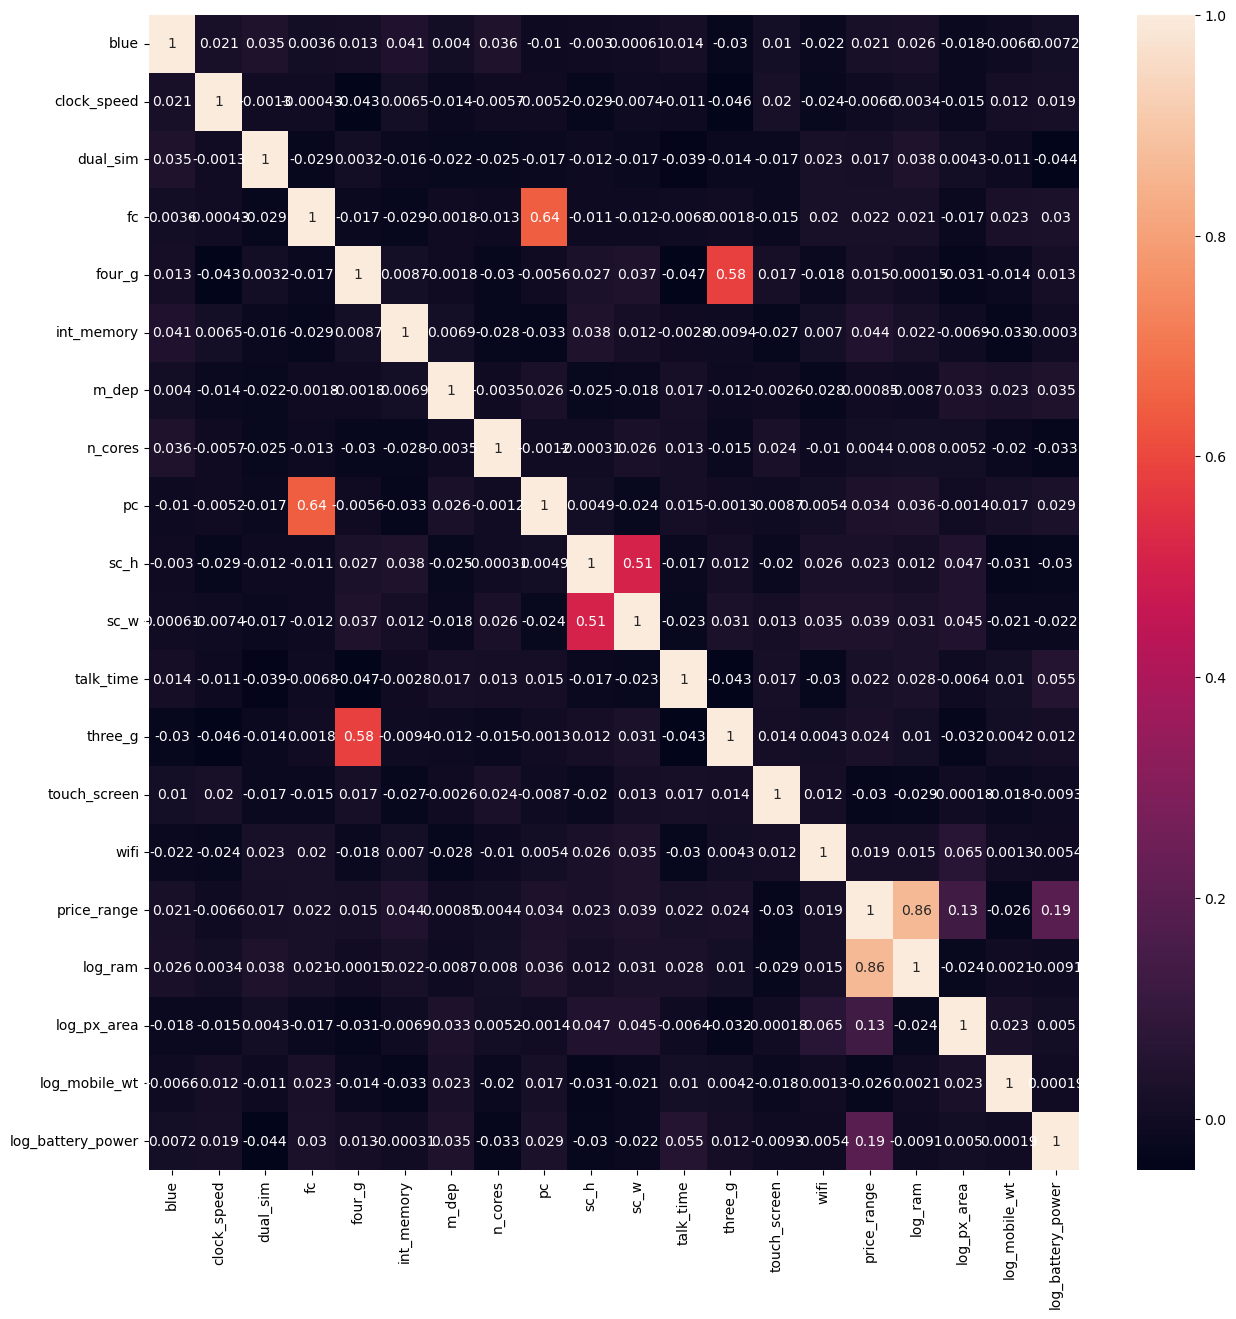

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

* All columns are important for target variable.

### Model selection

In [17]:
from sklearn.model_selection import train_test_split
X = df.drop("price_range",axis=1)
Y = df.price_range

In [18]:
# now split training and testing data
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=46)

### Model Creation and Model Evaluaion

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [20]:
LR1 = LogisticRegression()
LR1

LogisticRegression()

In [21]:
LR1.fit(x_train,y_train)

LogisticRegression()

In [22]:
X = df.drop("price_range",axis=1)
Y = df.price_range
score = cross_val_score(LR,X,Y,scoring="accuracy",cv=5)
score.mean() 

0.5445

In [23]:
score.std()  

0.010295630140986996

In [24]:
y_pred = LR1.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report

In [26]:
confusion_matrix(y_test,y_pred)

array([[78, 19,  2,  1],
       [24, 47, 18,  5],
       [ 3, 26, 39, 27],
       [ 0, 18, 24, 69]], dtype=int64)

In [27]:
Log_accuracy_score = accuracy_score(y_test,y_pred) # here log means logistic

In [28]:
Log_f1_score = f1_score(y_test,y_pred,average="weighted") # here log means logistic

In [29]:
print("Log_accuracy_score:",Log_accuracy_score,
     "Log_f1_score:",Log_f1_score)

Log_accuracy_score: 0.5825 Log_f1_score: 0.582389982266746


In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       100
           1       0.43      0.50      0.46        94
           2       0.47      0.41      0.44        95
           3       0.68      0.62      0.65       111

    accuracy                           0.58       400
   macro avg       0.58      0.58      0.58       400
weighted avg       0.59      0.58      0.58       400



## SVM Model

In [31]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split # for classification problem we use SVC

In [32]:
X = df.drop(columns=["price_range"])
y = df["price_range"]

In [33]:
X_train_svm, X_test_svm, Y_train_svm, Y_test_svm = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [34]:
svm_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=10, gamma="scale"))
svm_model.fit(X_train_svm, Y_train_svm)
Y_pred_svm = svm_model.predict(X_test_svm)

In [35]:
confusion_matrix(Y_test_svm,Y_pred_svm)

array([[93,  7,  0,  0],
       [ 9, 75, 16,  0],
       [ 0, 12, 81,  7],
       [ 0,  1,  8, 91]], dtype=int64)

In [36]:
svm_f1_score = f1_score(Y_test_svm,Y_pred_svm,average="weighted")

In [37]:
svm_accuracy_score = accuracy_score(Y_test_svm,Y_pred_svm)

In [38]:
print("svm_accuracy_sore:",svm_accuracy_score,
     "svm_f1_score:",svm_f1_score)

svm_accuracy_sore: 0.85 svm_f1_score: 0.8498646675174083


In [39]:
print(classification_report(Y_test_svm,Y_pred_svm))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       100
           1       0.79      0.75      0.77       100
           2       0.77      0.81      0.79       100
           3       0.93      0.91      0.92       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [40]:
x_pred = svm_model.predict(X_train_svm)

In [41]:
f1_score(Y_train_svm,x_pred,average="weighted")

1.0

In [42]:
accuracy_score(Y_train_svm,x_pred)

1.0

* without hyperparameter tuning, we observed overfitting

#### Hyper parameter tuning of SVM

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

In [44]:
smote = SMOTE()

In [45]:
X_train_smote,Y_train_smote = smote.fit_resample(X_train_svm,Y_train_svm)

In [46]:
params = {
    "C":[0.001,0.01,0.1,1],
    "gamma":[0.001,0.01,0.1,1],
    "kernel":["rbf","linear","sigmoid"]
}

In [47]:
svm1 = RandomizedSearchCV(estimator=SVC(),param_distributions=params,
                  cv=3,verbose=3,n_jobs=2,n_iter=50,refit=True,scoring="f1")

In [48]:
svm1.fit(X_train_smote,Y_train_smote)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


RandomizedSearchCV(cv=3, estimator=SVC(), n_iter=50, n_jobs=2,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1],
                                        'gamma': [0.001, 0.01, 0.1, 1],
                                        'kernel': ['rbf', 'linear', 'sigmoid']},
                   scoring='f1', verbose=3)

In [49]:
y_pred_svm = svm1.predict(X_test_svm)

In [50]:
SVM_accuracy_score = accuracy_score(Y_test_svm,y_pred_svm)

In [51]:
SVM_f1 = f1_score(y_test,y_pred,average="weighted")

In [52]:
print("SVM_accuracy_score:",SVM_accuracy_score,
     "SVM_f1_score:",SVM_f1)

SVM_accuracy_score: 0.29 SVM_f1_score: 0.582389982266746


## Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
x = df.drop(columns=["price_range"])
y = df["price_range"]

In [55]:
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(
    X, y, test_size=0.2, random_state=0
) # training and testing data for Decision Tree

In [56]:
dt = DecisionTreeClassifier()

In [57]:
dt.fit(x_train_dt,y_train_dt)

DecisionTreeClassifier()

In [58]:
y_pred_dt = dt.predict(x_test_dt)

In [59]:
accuracy_score(y_test_dt,y_pred_dt)

0.845

In [60]:
f1_score(y_test_dt,y_pred_dt,average="weighted")

0.8451284223407322

## Applying Ensemble Technique on Decision Tree
### Bagging

In [69]:
from sklearn.ensemble import BaggingClassifier

In [70]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                           n_estimators=100,random_state=0)

In [71]:
bagging.fit(x_train_dt,y_train_dt)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=0)

In [72]:
y_pred_bg = bagging.predict(x_test_dt)

In [73]:
accuracy_score(y_test_dt,y_pred_bg)

0.895

In [74]:
f1_score(y_test_dt,y_pred_bg,average="weighted")

0.8949762002697813

### Boosting
#### Gradient boosting

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

In [82]:
GB = GradientBoostingClassifier()

In [83]:
GB.fit(x_train_dt,y_train_dt)

GradientBoostingClassifier()

In [84]:
y_pred_bag = GB.predict(x_test_dt)

In [85]:
DT_Bag_accuracy = accuracy_score(y_test_dt,y_pred_bag) #Bag = bagging 

In [86]:
DT_Bag_f1 = f1_score(y_test_dt,y_pred_bag,average="weighted")

In [87]:
print("DT_Bag_accuracy_score:",DT_Bag_accuracy,
     "DT_Bag_f1_score:",DT_Bag_f1)

DT_Bag_accuracy_score: 0.905 DT_Bag_f1_score: 0.9043077659204269


### Xtreme Gradient Boosting

In [95]:
!pip install xgboost

In [96]:
from xgboost import XGBClassifier

In [97]:
xgb = XGBClassifier()

In [98]:
xgb.fit(x_train_dt,y_train_dt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [99]:
y_pred = xgb.predict(x_test_dt)

In [100]:
accuracy_score(y_test_dt,y_pred)

0.905

In [101]:
f1_score(y_test_dt,y_pred,average="weighted")

0.9046971170705459

### Random Forest

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rf = RandomForestClassifier()

In [111]:
rf.fit(x_train_dt,y_train_dt)

RandomForestClassifier()

In [112]:
y_pred = rf.predict(x_test_dt)

In [113]:
accuracy_score(y_test_dt,y_pred)

0.89

In [114]:
f1_score(y_test_dt,y_pred,average="weighted")

0.8887311387445025

#### Hyperparameter tuning of Random forest

In [115]:
params = {
    "n_estimators" : [50,100,250,150,200],      # List Comprehension-using for loop in list
    "max_features" : ['sqrt','log2'],        # maximum number of features allowed to try in individual tree
    "max_depth" : [5,10,8,12,15,None],            # List Comprehension-using for loop in list
    "min_samples_split" : [5, 10],          # minimum number of samples required to split an internal node
    "min_samples_leaf" : [2, 4]
} 

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
rf2 = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,
            cv=3,scoring="f1",n_jobs=1,refit=True,verbose=3)

In [118]:
rf2.fit(x_train_dt,y_train_dt)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=nan total time=   0.2s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=nan total time=   0.2s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50;, score=nan total time=   0.2s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.4s
[CV 2/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.4s
[CV 3/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.4s
[CV 1/3] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=250;, score=nan total time=   1.1s
[C

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [5, 10, 8, 12, 15, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100, 250, 150, 200]},
             scoring='f1', verbose=3)

In [119]:
y_pred_RF = rf2.predict(x_test_dt)

In [120]:
DTRF_f1 = f1_score(y_test_dt,y_pred_RF,average="weighted")

In [121]:
DTRF_accuracy = accuracy_score(y_test_dt,y_pred_RF)

In [122]:
print("DT_randomforest_accuracy_score:",DTRF_accuracy,
     "DT_randomforest_f1_score:",DTRF_f1)

DT_randomforest_accuracy_score: 0.8275 DT_randomforest_f1_score: 0.8232530589628797


## ANN 

In [123]:
from sklearn.neural_network import MLPClassifier

In [124]:
ann = MLPClassifier()

In [125]:
model =  MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,                 # L2 regularization
        learning_rate_init=1e-3,    # MUCH smaller than 0.1
        batch_size=64,
        max_iter=300,
        early_stopping=True,        # stops when val score plateaus
        n_iter_no_change=20,
        validation_fraction=0.1,
        tol=1e-4,
        random_state=42
    )
model.fit(x_train,y_train)

MLPClassifier(batch_size=64, early_stopping=True, hidden_layer_sizes=(128, 64),
              max_iter=300, n_iter_no_change=20, random_state=42)

In [126]:
y_pred = model.predict(x_test)

In [127]:
accuracy_score(y_test,y_pred)

0.4575

In [128]:
f1_score(y_test,y_pred,average="weighted")

0.3577234297585969

### Conlusion

* Decision Tree with bagging, Gradient boosting, Xtreme Gradient Boosting , Random Forest, these models are working good in this dataset

* Logistic regression, SVM(support vector machine), ANN. these are not working as generalize Model.

#### Decision Tree work better than all Models